In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.ascii
from scipy.optimize import curve_fit
from scipy.signal import lombscargle as ls
import numpy as np
from scipy.optimize import curve_fit
import math

In [2]:
with open("rad_vel.txt", "r") as f_in:
     rad_vel = []
     for line in f_in:
             # remove \n character at the end
             line = line.strip()
             # split it into 3 columns
             line = line.split()
             # add to data
             rad_vel.append(line)
     # first 3 rows are literally worthless
     rad_vel = rad_vel[3:]

# Data is like a table of rows, each row has 3 columns
# Values are strings, we parse them to floats
bjd1 = [float(row[0]) for row in rad_vel]
radial_velocity = [float(row[1]) for row in rad_vel]
radial_velocity_uncertainty = [float(row[2]) for row in rad_vel]

dataframe_dict1 = {"bjd": bjd1, "radial_velocity": radial_velocity, "radial_velocity_uncertainty": radial_velocity_uncertainty}
rad_vel_df = pd.DataFrame(data=dataframe_dict1)
rad_vel_df

,bjd,radial_velocity,radial_velocity_uncertainty
0,2.450682e+06,-14785.0,10.0
1,2.451028e+06,-14698.0,11.0
2,2.451028e+06,-14693.0,9.0
3,2.451057e+06,-14669.0,9.0
4,2.451087e+06,-14709.0,10.0
5,2.451123e+06,-14657.0,11.0
6,2.451154e+06,-14729.0,13.0
7,2.451156e+06,-14796.0,10.0
8,2.451158e+06,-14688.0,11.0
9,2.451353e+06,-14657.0,11.0


In [3]:
with open("photo.txt", "r") as f_in:
     photo = []
     for line in f_in:
             line = line.strip()
             line = line.split()
             photo.append(line)
     photo = photo[5:]

bjd2 = [float(row[0]) for row in photo]
magnitude = [float(row[1]) for row in photo]
magnitude_uncertainty = [float(row[2]) for row in photo]
data_quality_flag = [float(row[3]) for row in photo]
accepted_int = [float(row[4]) for row in photo]

dataframe_dict2 = {"bjd": bjd2, "magnitude": magnitude, "magnitude_uncertainty": magnitude_uncertainty, "data_quality_flag": data_quality_flag,"accepted_int": accepted_int}
photo_df = pd.DataFrame(data=dataframe_dict2)
photo_df

,bjd,magnitude,magnitude_uncertainty,data_quality_flag,accepted_int
0,2.447904e+06,7.7746,0.009,0.0,1.0
1,2.448018e+06,7.7866,0.009,0.0,1.0
2,2.448018e+06,7.7553,0.009,0.0,1.0
3,2.448045e+06,7.7747,0.010,1.0,1.0
4,2.448204e+06,7.7652,0.009,0.0,1.0
...,...,...,...,...,...
82,2.448944e+06,7.7778,0.011,0.0,1.0
83,2.448970e+06,7.7883,0.010,0.0,1.0
84,2.448970e+06,7.7669,0.009,0.0,1.0
85,2.448970e+06,7.7781,0.013,0.0,1.0


# Finding The Period

To find the period, we will use the code that Dasha made.

In [4]:
with open("rad_vel.txt", "r") as f_in:
     rad_vel = []
     for line in f_in:
             # remove \n character at the end
             line = line.strip()
             # split it into 3 columns
             line = line.split()
             # add to data
             rad_vel.append(line)
     # first 3 rows are literally worthless
     rad_vel = rad_vel[3:]

# Data is like a table of rows, each row has 3 columns
# Values are strings, we parse them to floats
bjd1 = [float(row[0]) for row in rad_vel]
radial_velocity = [float(row[1]) for row in rad_vel]
radial_velocity_uncertainty = [float(row[2]) for row in rad_vel]

dataframe_dict1 = {"bjd": bjd1, "radial_velocity": radial_velocity, "radial_velocity_uncertainty": radial_velocity_uncertainty}
rad_vel_df = pd.DataFrame(data=dataframe_dict1)
rad_vel_df

,bjd,radial_velocity,radial_velocity_uncertainty
0,2.450682e+06,-14785.0,10.0
1,2.451028e+06,-14698.0,11.0
2,2.451028e+06,-14693.0,9.0
3,2.451057e+06,-14669.0,9.0
4,2.451087e+06,-14709.0,10.0
5,2.451123e+06,-14657.0,11.0
6,2.451154e+06,-14729.0,13.0
7,2.451156e+06,-14796.0,10.0
8,2.451158e+06,-14688.0,11.0
9,2.451353e+06,-14657.0,11.0


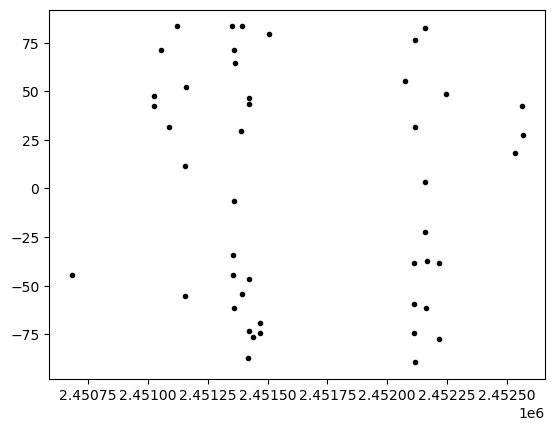

In [5]:
RV=rad_vel_df['radial_velocity']-np.mean(rad_vel_df['radial_velocity'])
rvbjd=rad_vel_df['bjd']

plt.plot(rvbjd,RV,'.k')

In [6]:
max(RV)-min(RV)

173.0

In [7]:
P1=np.linspace(1.,5.,50)

#write function
def freq(P):
    """
    Converts periods to frequencies. Expects 1 input:
    (1) a numpy array of periods
    
    Uses the formula freq=2pi/P to obtain angular frequencies
    """
    omega=2*np.pi/P
    return omega

#test function
test=freq(2*np.pi) #should return 1
print(test)
print('and it does! I can use this function for later things.')

1.0
and it does! I can use this function for later things.


Text(0.5, 1.0, 'periodogram with frequencies')

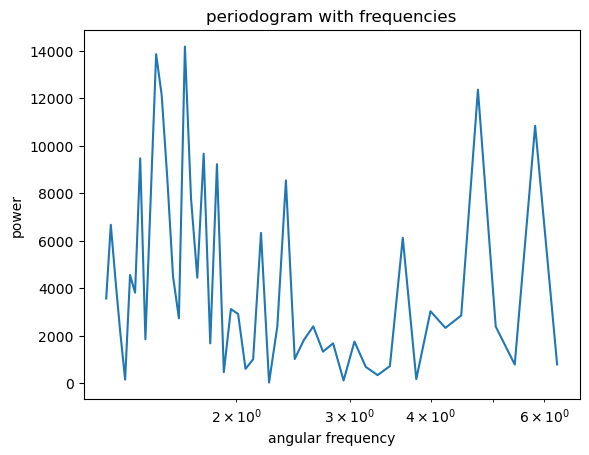

In [8]:
freq1=freq(P1) #make array of frequencies to plug into periodogram
ls1=ls(rvbjd,RV,freq1)

fig, ax=plt.subplots()
ax.semilogx(freq1,ls1)
ax.semilogx(freq1[50:300],ls1[50:300])
ax.set_xlabel('angular frequency')
ax.set_ylabel('power')
ax.set_title('periodogram with frequencies')

/var/folders/l5/zs7f0lx525b0jl3ctgsmn9mc0000gn/T/ipykernel_49850/1295925379.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


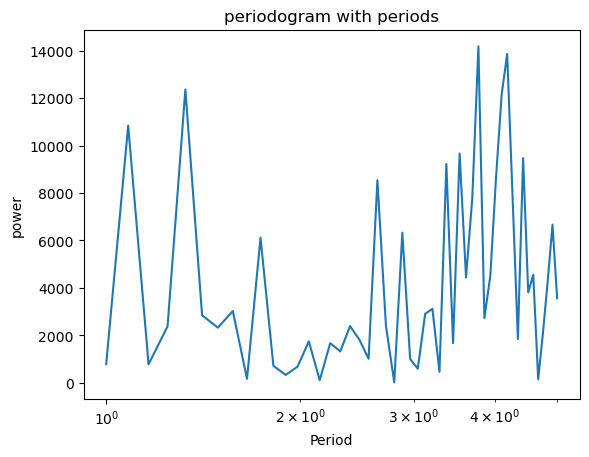

In [9]:
fig, ax=plt.subplots()
ax.semilogx(P1,ls1)
ax.set_xlabel('Period')
ax.set_ylabel('power')
ax.set_title('periodogram with periods')
fig.show()


In [10]:
d=np.argmax(ls1)
f=freq1[d]
P=2*np.pi/f
print(P,'days') #NEA says 3.5427 days (close enough)

3.7755102040816326 days


# Finding K

This next part will focus on finding K from the amplitude of the sine function of the RV data.

In [11]:
rad_vel_df["fixed_bjd"] = rad_vel_df['bjd'] - rad_vel_df['bjd'][0]
rad_vel_df.head()

,bjd,radial_velocity,radial_velocity_uncertainty,fixed_bjd
0,2.450682e+06,-14785.0,10.0,0.0000
1,2.451028e+06,-14698.0,11.0,346.0133
2,2.451028e+06,-14693.0,9.0,346.0259
3,2.451057e+06,-14669.0,9.0,374.9872
4,2.451087e+06,-14709.0,10.0,405.8833


In [12]:
rad_vel_df["fixed_rad_vel"] = rad_vel_df['radial_velocity'] - rad_vel_df['radial_velocity'].mean()
rad_vel_df.head()

,bjd,radial_velocity,radial_velocity_uncertainty,fixed_bjd,fixed_rad_vel
0,2.450682e+06,-14785.0,10.0,0.0000,-44.5
1,2.451028e+06,-14698.0,11.0,346.0133,42.5
2,2.451028e+06,-14693.0,9.0,346.0259,47.5
3,2.451057e+06,-14669.0,9.0,374.9872,71.5
4,2.451087e+06,-14709.0,10.0,405.8833,31.5


In [49]:
def sine_function(x, A, C, D):
    return A * np.sin(2*math.pi/3.7755102040816326 * x + C) + D

Fitted parameters: A={A_fit}, C={C_fit}, D={D_fit}


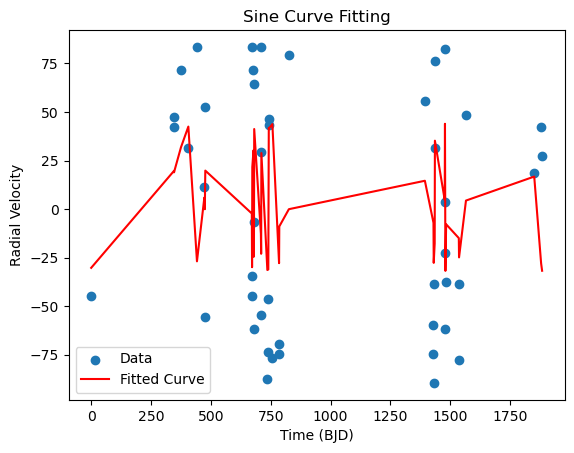

In [50]:
# Initial guess for the parameters [A, C, D]
initial_guess = [5, 0, 0]

params, covariance = curve_fit(sine_function, rad_vel_df['fixed_bjd'], rad_vel_df['fixed_rad_vel'], p0=initial_guess)

A_fit, C_fit, D_fit = params

print("Fitted parameters: A={A_fit}, C={C_fit}, D={D_fit}")
# Generate y values using the fitted parameters
y_fit = sine_function(rad_vel_df['fixed_bjd'], A_fit, C_fit, D_fit)


# Plotting data
plt.scatter(rad_vel_df['fixed_bjd'], rad_vel_df['fixed_rad_vel'], label='Data')
plt.plot(rad_vel_df['fixed_bjd'], y_fit, label='Fitted Curve', color='red')
plt.xlabel('Time (BJD)')
plt.ylabel('Radial Velocity')
plt.title('Sine Curve Fitting')
plt.legend()
plt.show()

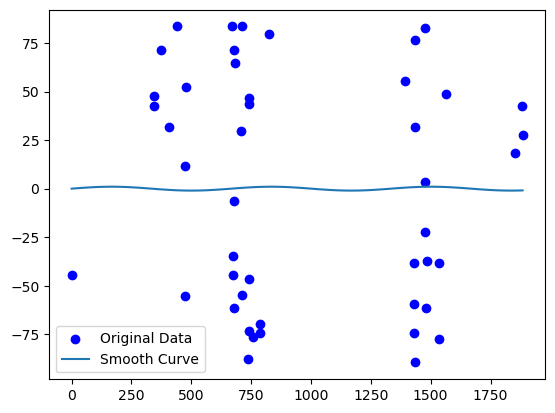

In [59]:
x_smooth = np.linspace(rad_vel_df['fixed_bjd'].min(), rad_vel_df['fixed_bjd'].max(), 100) 
y_smooth = np.sin(x_smooth)  

# Plot
plt.scatter(rad_vel_df['fixed_bjd'], rad_vel_df['fixed_rad_vel'], color='blue', label="Original Data")
plt.plot(x_smooth, y_smooth, label="Smooth Curve")
plt.legend()
plt.show()